# FENE beadspring experiment data analysis

In [1]:
import os

import polyflexmd.data_analysis.data.read as read
import polyflexmd.data_analysis.transform.transform as transform
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandarallel import pandarallel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pandarallel.initialize(
    nb_workers=24,
    progress_bar=True,
    use_memory_fs=False
)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Read data

In [ ]:
PATH_EXPERIMENT = "/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring/55f1793a"

In [4]:
PATH_EXPERIMENT = pathlib.Path(PATH_EXPERIMENT)

PATHS_TRAJECTORIES = [
    PATH_EXPERIMENT / "data/polymer_relax.out",
    PATH_EXPERIMENT / "data/polymer.out",
]

PATH_SYSTEM_DEF = PATH_EXPERIMENT / "data/initial_system.data"

### Trajectory df

In [5]:
df_trajectory_raw = read.read_multiple_raw_trajectory_dfs(PATHS_TRAJECTORIES)
df_trajectory_raw

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,-0.468830,-0.882494,0.037444,0,0,0
2,0,3,2,-0.423779,-0.970236,1.032570,0,0,0
3,0,4,2,-0.074626,-1.884670,0.827882,0,0,0
4,0,5,2,-0.117715,-1.744990,1.817140,0,0,0
...,...,...,...,...,...,...,...,...,...
2555,45000000,2556,2,16.834600,-10.829500,-12.841700,0,0,0
2556,45000000,2557,2,17.640900,-11.288900,-12.509300,0,0,0
2557,45000000,2558,2,18.297400,-11.795700,-12.052400,0,0,0
2558,45000000,2559,2,18.728000,-12.621000,-11.710500,0,0,0


### System def

In [6]:
system = read.read_lammps_system_data(PATH_SYSTEM_DEF)
system.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,-0.468830,-0.882494,0.037444,0,0,0
3,1,2,-0.423779,-0.970236,1.032568,0,0,0
4,1,2,-0.074626,-1.884673,0.827882,0,0,0
5,1,2,-0.117715,-1.744995,1.817141,0,0,0
...,...,...,...,...,...,...,...,...
2556,20,2,-4.071141,4.105128,-8.884395,0,0,0
2557,20,2,-3.448422,3.879265,-8.135258,0,0,0
2558,20,2,-3.578386,3.785366,-9.122321,0,0,0
2559,20,2,-3.644464,3.916408,-8.133148,0,0,0


In [7]:
system.bonds

,type,atom1,atom2
1,1,1,2
2,1,2,3
3,1,3,4
4,1,4,5
5,1,5,6
...,...,...,...
2536,1,2555,2556
2537,1,2556,2557
2538,1,2557,2558
2539,1,2558,2559


In [8]:
system.angles

,type,atom1,atom2,atom3
1,1,1,2,3
2,1,2,3,4
3,1,3,4,5
4,1,4,5,6
5,1,5,6,7
...,...,...,...,...
2516,1,2554,2555,2556
2517,1,2555,2556,2557
2518,1,2556,2557,2558
2519,1,2557,2558,2559


In [9]:
system.box

-100.000000 100.000000  xlo xhi
-100.000000 100.000000  ylo yhi
-100.000000 100.000000  zlo zhi

## Process data

Join molecule id information

In [10]:
df_trajectory = transform.join_raw_trajectory_df_with_system_data(
    df_trajectory_raw, system
)
df_trajectory

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,-0.468830,-0.882494,0.037444,0,0,0,1
2,0,3,2,-0.423779,-0.970236,1.032570,0,0,0,1
3,0,4,2,-0.074626,-1.884670,0.827882,0,0,0,1
4,0,5,2,-0.117715,-1.744990,1.817140,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2555,45000000,2556,2,16.834600,-10.829500,-12.841700,0,0,0,20
2556,45000000,2557,2,17.640900,-11.288900,-12.509300,0,0,0,20
2557,45000000,2558,2,18.297400,-11.795700,-12.052400,0,0,0,20
2558,45000000,2559,2,18.728000,-12.621000,-11.710500,0,0,0,20


Unfold coordinates

In [11]:
df_trajectory_unfolded = transform.unfold_coordinates_df(df_trajectory, system)
df_trajectory_unfolded

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,-0.468830,-0.882494,0.037444,0,0,0,1
2,0,3,2,-0.423779,-0.970236,1.032570,0,0,0,1
3,0,4,2,-0.074626,-1.884670,0.827882,0,0,0,1
4,0,5,2,-0.117715,-1.744990,1.817140,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2555,45000000,2556,2,16.834600,-10.829500,-12.841700,0,0,0,20
2556,45000000,2557,2,17.640900,-11.288900,-12.509300,0,0,0,20
2557,45000000,2558,2,18.297400,-11.795700,-12.052400,0,0,0,20
2558,45000000,2559,2,18.728000,-12.621000,-11.710500,0,0,0,20


## Calculate and plot observables

### End-to-End distance $\vec{R}$

In [12]:
df_ete = transform.calc_end_to_end_df(df_trajectory_unfolded)
df_ete

R_x        R_y       R_z          R
molecule-ID t                                                 
1           0          1.14267  -4.886210   2.39807   5.561608
            100000     7.29783 -11.702500   4.16974  14.408107
            200000    12.58900   4.521730  -4.82776  14.220979
            300000     4.51194  -0.832617   4.95435   6.752513
            400000    -1.34364   4.433760 -16.19060  16.840402
...                        ...        ...       ...        ...
20          44960000  21.86880  -9.261280 -12.34550  26.766156
            44970000  16.45250 -13.460700 -12.42560  24.622566
            44980000  13.94080 -10.347600 -11.38860  20.763404
            44990000  16.23400 -13.655400 -13.02510  24.893090
            45000000  19.42370 -13.273900 -11.48780  26.181025

[63020 rows x 4 columns]

<Axes: title={'center': 'End-to-end distance $R$ over time.'}, xlabel='t', ylabel='$R$'>

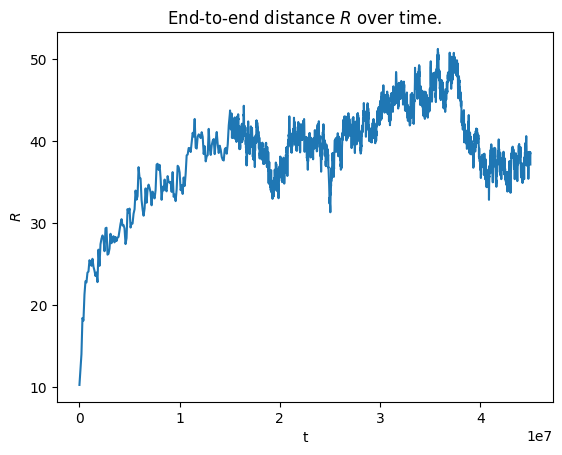

In [18]:
df_ete.groupby("t")["R"].mean().plot(title="End-to-end distance $R$ over time.", ylabel="$R$")

### Change of end-to-end distance over time $g_4$

$g_4(t) = \langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$

In [15]:
df_ete_change = transform.calculate_ete_change_ens_avg_df(df_ete)
df_ete_change

t
0              0.000000
100000       121.531119
200000       201.645579
300000       282.784511
400000       273.102929
               ...     
44960000    1767.155203
44970000    1821.696934
44980000    1808.913207
44990000    1813.622412
45000000    1677.263368
Length: 3151, dtype: float64

<Axes: title={'center': '$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'}, xlabel='t', ylabel='$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'>

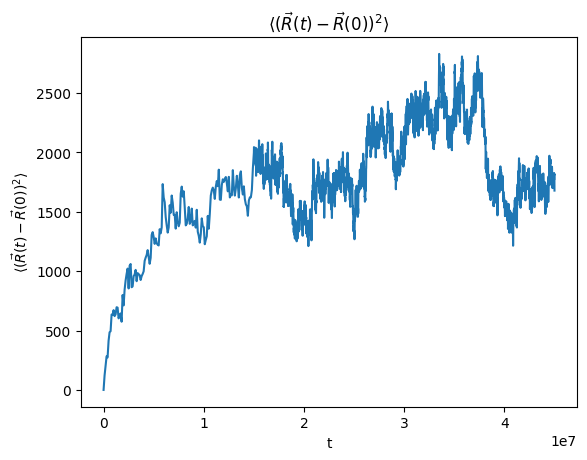

In [21]:
df_ete_change.plot(title=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$",
                   ylabel=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$")

### Average distance between neighbours $l^2$
$l^2 = \langle (r_k - r_{k-1})^2 \rangle $

In [17]:
l_squared = transform.calculate_neigh_distance_avg_df(df_trajectory_unfolded)
l_squared

0.9451951140204373